In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
temp_units = "imperial"

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
# Output File (CSV)
output_data_file = "weatherpy/weather_df.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q="

# define count of pass throughs
count_one = 0
set_one = 1

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

In [5]:
# Define an empty list to fetch the weather data for each city
city_data = []

In [6]:
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------


In [7]:
# Create counters
record_count = 1
set_count = 1

In [8]:
# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
# Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
# Create endpoint URL with each city
    params = {
        "q": city,
        "appid": weather_api_key,
        "units": "metric"  # You can change units to imperial if needed
    }
    
    response = requests.get(url, params=params)
   
    
    
    # Process the response data here
    # You can extract the weather information from the response JSON
    
    # Example: Print the city name and temperature
    if response.status_code == 200:
        weather_data = response.json()
        temperature = weather_data["main"]["temp"]
        lat= weather_data["coord"]["lat"]
        lon= weather_data["coord"]["lon"]
        cloud= weather_data["clouds"]["all"]
        humi= weather_data["main"]["humidity"]
        wind= weather_data["wind"]["speed"]
        
        city_data.append({
            "city":city,
            "Temperature":temperature,
            "Longitude":lon,
            "Latitude":lat,
            "Cloudiness":cloud,
            "Wind Speed":wind,
            "Humidity":humi
        })
        
        print(f"City: {city}, Windspeed: {wind}")
        print(f"City: {city}, Humidity: {humi}")
        print(f"City: {city}, Cloudiness: {cloud}")
        print(f"City: {city}, Longitude: {lon}")
        print(f"City: {city}, Latitude: {lat}")
        print(f"City: {city}, Temperature: {temperature}°C")
        print("-----------------------------")
    else:
        print(f"City: {city} not found. Status code: {response.status_code}")

City: albany, Windspeed: 1.63
City: albany, Humidity: 62
City: albany, Cloudiness: 0
City: albany, Longitude: -73.9662
City: albany, Latitude: 42.6001
City: albany, Temperature: 6.64°C
-----------------------------
City: keflavik, Windspeed: 4.12
City: keflavik, Humidity: 80
City: keflavik, Cloudiness: 40
City: keflavik, Longitude: -22.5624
City: keflavik, Latitude: 64.0049
City: keflavik, Temperature: -0.76°C
-----------------------------
City: port-aux-francais, Windspeed: 16.42
City: port-aux-francais, Humidity: 64
City: port-aux-francais, Cloudiness: 91
City: port-aux-francais, Longitude: 70.2167
City: port-aux-francais, Latitude: -49.35
City: port-aux-francais, Temperature: 3.93°C
-----------------------------
City: pisco, Windspeed: 2.57
City: pisco, Humidity: 88
City: pisco, Cloudiness: 0
City: pisco, Longitude: -76.2167
City: pisco, Latitude: -13.7
City: pisco, Temperature: 20.03°C
-----------------------------
City: houma, Windspeed: 4.12
City: houma, Humidity: 84
City: houma,

In [9]:
#establish dataframe 
city_data_df=pd.DataFrame(city_data)
city_data_df

,city,Temperature,Longitude,Latitude,Cloudiness,Wind Speed,Humidity
0,albany,6.64,-73.9662,42.6001,0,1.63,62
1,keflavik,-0.76,-22.5624,64.0049,40,4.12,80
2,port-aux-francais,3.93,70.2167,-49.3500,91,16.42,64
3,pisco,20.03,-76.2167,-13.7000,0,2.57,88
4,houma,22.39,-90.7195,29.5958,40,4.12,84
...,...,...,...,...,...,...,...
571,maibong,33.23,93.1667,25.3000,96,1.62,28
572,corfu,16.88,19.9197,39.6200,40,0.00,88
573,chishmy,10.13,55.3764,54.5765,100,5.26,75
574,tazacorte,18.54,-17.9293,28.6290,0,4.12,88


In [10]:
# output data to csv
city_data_df.to_csv(output_data_file)

In [11]:
#spilt between north and south 
north=city_data_df.loc[city_data_df["Latitude"]>=0]
south=city_data_df.loc[city_data_df["Latitude"]<0]
north

,city,Temperature,Longitude,Latitude,Cloudiness,Wind Speed,Humidity
0,albany,6.64,-73.9662,42.6001,0,1.63,62
1,keflavik,-0.76,-22.5624,64.0049,40,4.12,80
4,houma,22.39,-90.7195,29.5958,40,4.12,84
7,tazovsky,-8.98,78.7000,67.4667,100,7.62,94
8,bethel,13.39,-73.4140,41.3712,20,5.66,48
...,...,...,...,...,...,...,...
571,maibong,33.23,93.1667,25.3000,96,1.62,28
572,corfu,16.88,19.9197,39.6200,40,0.00,88
573,chishmy,10.13,55.3764,54.5765,100,5.26,75
574,tazacorte,18.54,-17.9293,28.6290,0,4.12,88


In [21]:
def createchart(df, y_col, coord, label=None, title=None):
    x = df["Latitude"]
    y = df[y_col]
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    plt.scatter(x, y, edgecolors="black", facecolors="skyblue")
    plt.plot(x, regress_values, "c-")
    plt.annotate(line_eq, coord, fontsize=15, color="cyan")
    
    plt.xlabel('Latitude')
    if label:
        plt.ylabel(label)
    if title:
        plt.title(title)
    
    plt.show()
    print(f"R squared: {rvalue**2}")

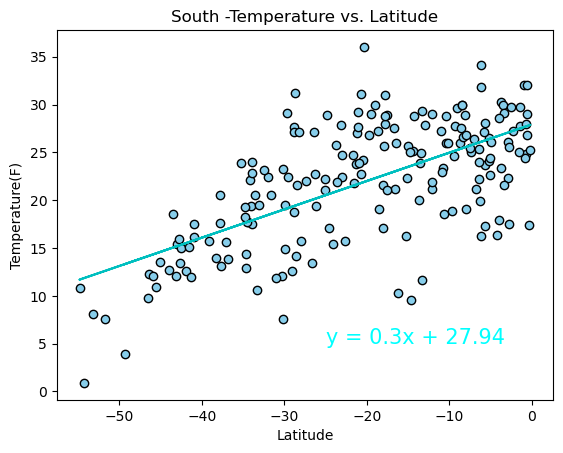

R squared: 0.4201342447441198


In [23]:
# Call the function with the additional parameters
createchart(south, "Temperature", (-25, 5), label="Temperature(F)", title="South -Temperature vs. Latitude")

In [ ]:
#There is a weak positive correlation (r=0.42) between increase in latitude and increase in temperature.

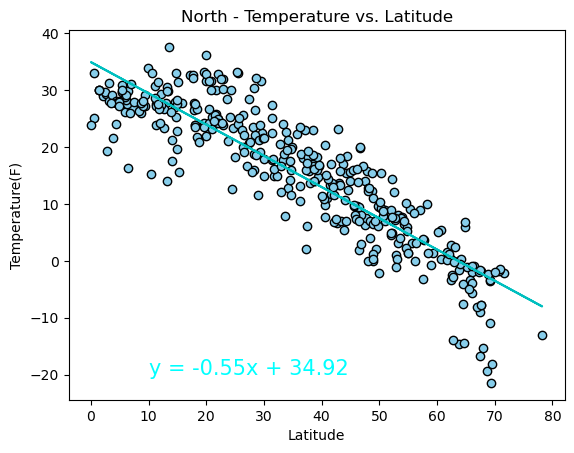

R squared: 0.8047609779398416


In [24]:
#Temperature VS Latitude
createchart(north,"Temperature",(10,-20), label="Temperature(F)", title="North - Temperature vs. Latitude")
plt.show()

In [ ]:
#Therre is a strong positive correlation (r=0.80) in the Northern Hemisphere between increase in latitude and temperature. 


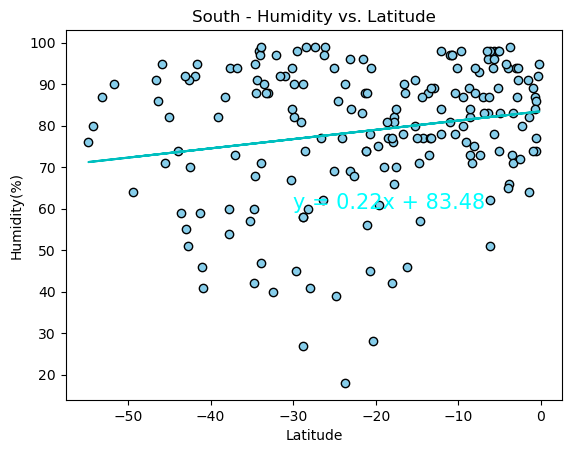

R squared: 0.036639453714661346


In [25]:
#Humidity VS Latitude
createchart(south,"Humidity",(-30,60), label="Humidity(%)", title="South - Humidity vs. Latitude")
plt.show()

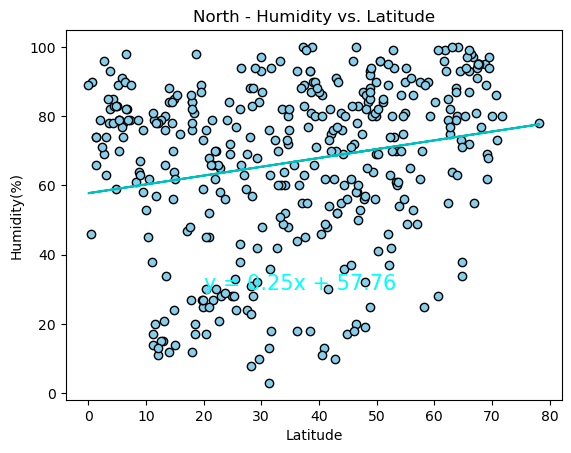

R squared: 0.04373292427460918


In [26]:
#Humidity VS Latitude
createchart(north,"Humidity",(20,30), label="Humidity(%)", title="North - Humidity vs. Latitude")
plt.show()

In [ ]:
#very weak (nh = 0.36, sh = 0.43) or no correlation between humidity and latitude in either hemisphere.

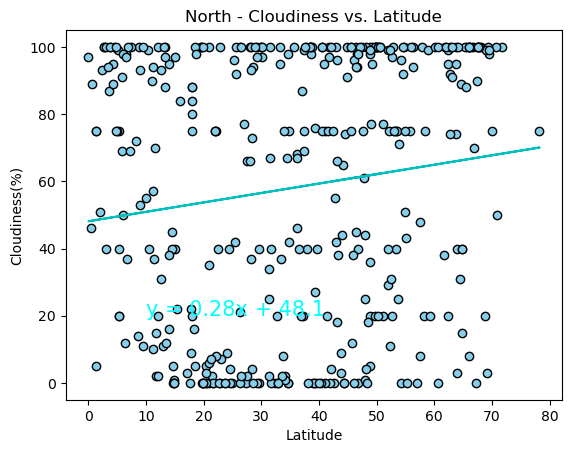

R squared: 0.0192083179698346


In [27]:
#Cloudiness VS Latitude
createchart(north,"Cloudiness",(10,20), label="Cloudiness(%)", title="North - Cloudiness vs. Latitude")
plt.show()

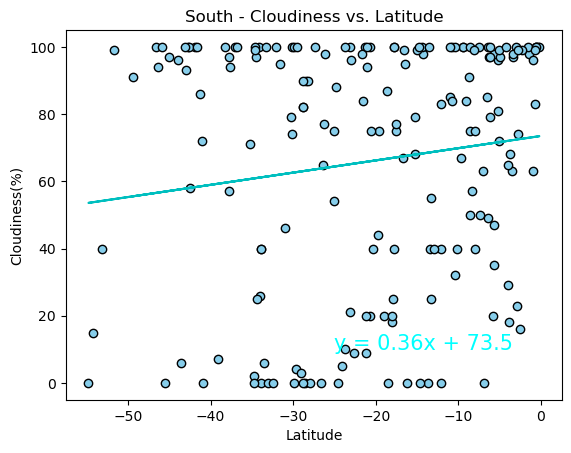

R squared: 0.019321659720209022


In [29]:
#Cloudiness VS Latitude
createchart(south,"Cloudiness",(-25,10), label="Cloudiness(%)", title="South - Cloudiness vs. Latitude")
plt.show()

In [ ]:
#no correlation between Cloudiness and latitude in either hemisphere.

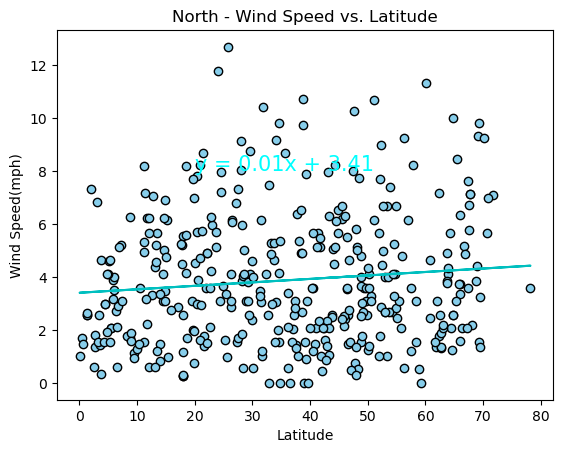

R squared: 0.010669638114387592


In [30]:
#Wind Speed VS Latitude
createchart(north,"Wind Speed",(20,8), label="Wind Speed(mph)", title="North - Wind Speed vs. Latitude")
plt.show()

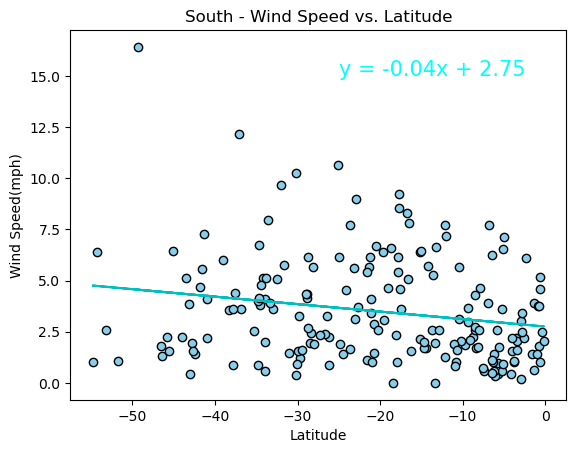

R squared: 0.03971715745622997


In [31]:
#Wind Speed VS Latitude
createchart(south,"Wind Speed",(-25,15), label="Wind Speed(mph)", title="South - Wind Speed vs. Latitude")
plt.show()

In [ ]:
#no correlation (nh = 0.01, sh = 0.04) between winds speed and latitude in either hemisphere.